In [46]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go
import itertools
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [47]:
df = pd.read_csv(r'D:\Adeel\TSAF\TSAF_120_126_2022_2024_NEW.csv')

In [48]:
df1 = df.copy()
df1.head()

,Location_code,DATE,WEEK_NUMBER,day_type,month_type,ITEM_SUBCLASS,TRX_COUNT,UNIQUE_PRODUCTS_SOLD,QTY_OF_PRODUCTS_SOLD,SALES,COGS
0,120,2022-01-01,1,Weekend,Others,NaN,174,48,289.0,2654.480,2413.3939
1,120,2022-01-01,1,Weekend,Others,3 IN 1 COFFEE,78,14,159.0,1380.791,1105.9092
2,120,2022-01-01,1,Weekend,Others,A-F DISPENSER,1,1,1.0,40.000,31.5000
3,120,2022-01-01,1,Weekend,Others,A-F DISPENSER REFILL,4,3,7.0,333.263,261.3332
4,120,2022-01-01,1,Weekend,Others,A-F OIL DIFFUSER,1,1,1.0,56.956,43.5000


In [49]:
df1['DATE'] = pd.to_datetime(df1['DATE'])
df1 = df1[df1['Location_code'] == 120]
df1 = df1[df1['SALES'] >= 0]
df1 = df1.drop(columns=['UNIQUE_PRODUCTS_SOLD','QTY_OF_PRODUCTS_SOLD', 'Location_code', 'TRX_COUNT', 'COGS', 'WEEK_NUMBER','ITEM_SUBCLASS'])

In [50]:
df1.head()

,DATE,day_type,month_type,SALES
0,2022-01-01,Weekend,Others,2654.480
1,2022-01-01,Weekend,Others,1380.791
2,2022-01-01,Weekend,Others,40.000
3,2022-01-01,Weekend,Others,333.263
4,2022-01-01,Weekend,Others,56.956


In [51]:
df1['year'] = df1['DATE'].dt.year
df1['month'] = df1['DATE'].dt.month
df1['day'] = df1['DATE'].dt.day
df1['day_of_week'] = df1['DATE'].dt.dayofweek
df1['iso_week'] = df1['DATE'].dt.isocalendar().week

In [52]:
df1

,DATE,day_type,month_type,SALES,year,month,day,day_of_week,iso_week
0,2022-01-01,Weekend,Others,2654.480,2022,1,1,5,52
1,2022-01-01,Weekend,Others,1380.791,2022,1,1,5,52
2,2022-01-01,Weekend,Others,40.000,2022,1,1,5,52
3,2022-01-01,Weekend,Others,333.263,2022,1,1,5,52
4,2022-01-01,Weekend,Others,56.956,2022,1,1,5,52
...,...,...,...,...,...,...,...,...,...
874551,2024-06-25,Weekday,DulHajj,149.500,2024,6,25,1,26
874552,2024-06-25,Weekday,DulHajj,449.340,2024,6,25,1,26
874553,2024-06-25,Weekday,DulHajj,62.000,2024,6,25,1,26
874554,2024-06-25,Weekday,DulHajj,35.900,2024,6,25,1,26


In [53]:
df2 = df1.groupby(['DATE','month','year', 'month_type', 'day', 'day_of_week', 'day_type','iso_week'])['SALES'].sum().reset_index()

In [54]:
df2 = df2.sort_values(by='DATE')
df2.head()

,DATE,month,year,month_type,day,day_of_week,day_type,iso_week,SALES
0,2022-01-01,1,2022,Others,1,5,Weekend,52,709714.743
1,2022-01-02,1,2022,Others,2,6,Weekday,52,275212.841
2,2022-01-03,1,2022,Others,3,0,Weekday,1,276692.633
3,2022-01-04,1,2022,Others,4,1,Weekday,1,277210.191
4,2022-01-05,1,2022,Others,5,2,Weekday,1,296179.214


In [55]:
df2_r = df2.set_index('DATE')

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your index is datetime and you have X and y defined as follows:
X = df2_r[['year','month','month_type','day','day_of_week','day_type']]
y = df2_r[['SALES']]

# Step 1: Train-Test Split (80-20%)
split_date_trainval = '2024-03-31'
split_date_test = '2024-06-20'

X_trainval = X[X.index <= (split_date_trainval)]
X_test = X[(X.index > (split_date_trainval)) & (X.index <= (split_date_test))]
y_trainval = y[y.index <= (split_date_trainval)]
y_test = y[(y.index > (split_date_trainval)) & (y.index <= (split_date_test))]

# Step 2: Train-Validation Split (75-25% of the remaining data for cross-validation)
split_date_train = '2024-01-31'

X_train = X_trainval[X_trainval.index <= (split_date_train)]
X_val = X_trainval[(X_trainval.index > (split_date_train)) & (X_trainval.index <= (split_date_trainval))]
y_train = y_trainval[y_trainval.index <= (split_date_train)]
y_val = y_trainval[(y_trainval.index > (split_date_train)) & (y_trainval.index <= (split_date_trainval))]

In [57]:
X_train = X_train.reset_index()
X_val = X_val.reset_index()
y_train = y_train.reset_index()
y_val = y_val.reset_index()

In [58]:
X_train = X_train.drop(columns=['DATE'])
X_val = X_val.drop(columns=['DATE'])
y_train = y_train.drop(columns=['DATE'])
y_val = y_val.drop(columns=['DATE'])

In [59]:
# Define categorical and numerical features
categorical_features = ['year','month','month_type','day','day_of_week','day_type']
# numerical_features = ['WEEK_NUMBER', 'YEAR', 'MONTH']

In [60]:
preprocessor = ColumnTransformer(
    transformers=[
        # ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), categorical_features)
    ]
)

In [61]:
def batch_process_linear(X, y, model, batch_size=10000):
    start_idx = 0
    y_pred = np.empty((0, y.shape[1]))  # Initialize an empty array with the same number of columns as y
    while start_idx < len(X):
        end_idx = min(start_idx + batch_size, len(X))
        X_batch = X[start_idx:end_idx]
        y_batch = y[start_idx:end_idx]

        # Fit the model on the current batch
        model.fit(X_batch, y_batch)
        
        # Predict on the current batch
        y_batch_pred = model.predict(X_batch)
        
        # Accumulate predictions
        y_pred = np.vstack((y_pred, y_batch_pred))
        
        start_idx += batch_size
    
    return y_pred

In [62]:
pipeline_simple = Pipeline([
    ('preprocessor', preprocessor),
    # ('scaler', StandardScaler(with_mean=False)),  # Scale features without centering
    ('regressor', LinearRegression())
])

In [63]:
pipeline_simple.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['year', 'month',
                                                   'month_type', 'day',
                                                   'day_of_week',
                                                   'day_type'])])),
                ('regressor', LinearRegression())])

In [64]:
def batch_predict(X, model, batch_size=10000):
    start_idx = 0
    y_pred = np.empty((0, y_train.shape[1]))  # Initialize an empty array with the same number of columns as y_train
    while start_idx < len(X):
        end_idx = min(start_idx + batch_size, len(X))
        X_batch = X[start_idx:end_idx]

        # Predict on the current batch
        y_batch_pred = model.predict(X_batch)
        
        # Accumulate predictions
        y_pred = np.vstack((y_pred, y_batch_pred))
        
        start_idx += batch_size
    
    return y_pred

In [65]:
y_val_pred_simple = batch_predict(X_val, pipeline_simple)
r2_val_simple = r2_score(y_val, y_val_pred_simple)
mse_val_simple = mean_squared_error(y_val, y_val_pred_simple)
mae_val_simple = mean_absolute_error(y_val, y_val_pred_simple)
print("Simple Linear Regression Results:")
print(f'Validation R-squared: {r2_val_simple:.2f}')
print(f'Validation Mean Squared Error: {mse_val_simple:.2f}')
print(f'Validation Mean Absolute Error: {mae_val_simple:.2f}')

print()

Simple Linear Regression Results:
Validation R-squared: 0.33
Validation Mean Squared Error: 5681881835.44
Validation Mean Absolute Error: 52554.58



In [66]:
# Combine year, month, and day into a single datetime column
X_train['date'] = pd.to_datetime(X_train[['year', 'month', 'day']])
X_val['date'] = pd.to_datetime(X_val[['year', 'month', 'day']])
X_test['date'] = pd.to_datetime(X_test[['year', 'month', 'day']])

C:\Users\Adeel Zia Khan\AppData\Local\Temp\ipykernel_13400\3831377862.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
import plotly.graph_objs as go
import plotly.express as px

# Assuming your data is in a pandas DataFrame format with datetime index
# Let's create a figure for the plot
fig = go.Figure()

# Add training data
fig.add_trace(go.Scatter(x=X_train['date'], y=y_train['SALES'], mode='lines+markers', name='Training Data'))

# Add validation data
fig.add_trace(go.Scatter(x=X_val['date'], y=y_val['SALES'], mode='lines+markers', name='Validation Data'))

# Add forecasted values
fig.add_trace(go.Scatter(x=X_val['date'], y=y_val_pred_simple.flatten(), mode='lines+markers', name='Forecast', line=dict(dash='dash')))

# Update layout
fig.update_layout(title='Regression Forecast',
                  xaxis_title='Date',
                  yaxis_title='Sales')

# Show the plot interactively
fig.show()

In [68]:
residuals =  y_val - y_val_pred_simple 
# Calculate mean and standard deviation of residuals
residual_mean = float(np.mean(residuals))
residual_std = float(np.std(residuals))

d:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning:

The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\Adeel Zia Khan\AppData\Local\Temp\ipykernel_13400\242182830.py:4: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



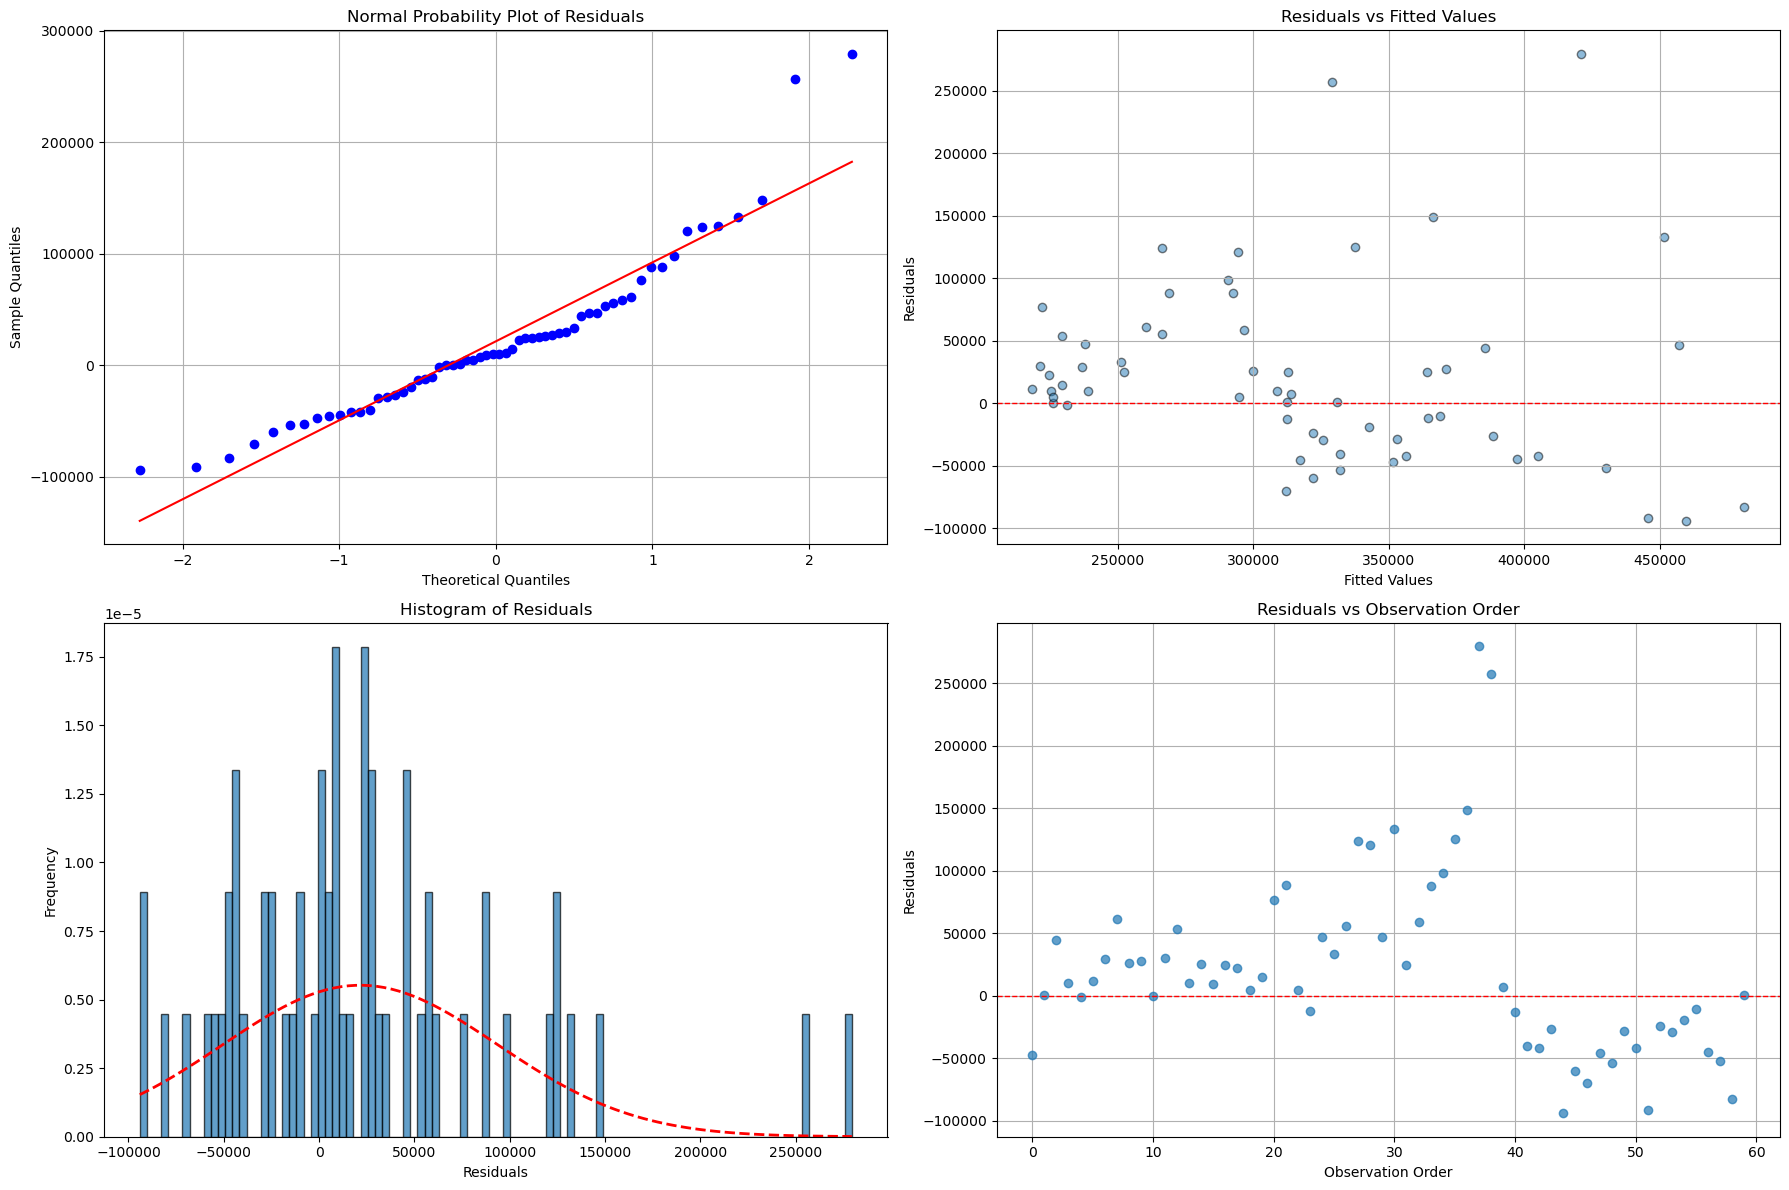

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Assuming y_val_pred_simple are your fitted values (predicted values)
# Assuming residuals is your array of residuals
residuals = residuals.values if isinstance(residuals, pd.DataFrame) else residuals

# Plotting rearranged plots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

residuals = residuals.flatten()
# Plot 1: Q-Q Plot of Residuals
stats.probplot(residuals, dist="norm", plot=axs[0, 0])
axs[0, 0].get_lines()[0].set_markersize(6)  # Adjust marker size for clarity
axs[0, 0].set_title('Normal Probability Plot of Residuals')
axs[0, 0].set_xlabel('Theoretical Quantiles')
axs[0, 0].set_ylabel('Sample Quantiles')
axs[0, 0].grid(True)

# Plot 2: Residuals vs Fitted Values
axs[0, 1].scatter(y_val_pred_simple, residuals, alpha=0.5, edgecolor='k')
axs[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=1)  # Horizontal line at residual = 0
axs[0, 1].set_title('Residuals vs Fitted Values')
axs[0, 1].set_xlabel('Fitted Values')
axs[0, 1].set_ylabel('Residuals')
axs[0, 1].grid(True)

# Plot 3: Histogram of Residuals with Normal Distribution Curve
axs[1, 0].hist(residuals, bins=100, edgecolor='black', alpha=0.7, density=True)
axs[1, 0].set_title('Histogram of Residuals')
axs[1, 0].set_xlabel('Residuals')
axs[1, 0].set_ylabel('Frequency')

# Adding a normal distribution curve
xmin, xmax = np.min(residuals), np.max(residuals)
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5 * ((x - residuals.mean()) / residuals.std())**2) / (residuals.std() * np.sqrt(2 * np.pi))
axs[1, 0].plot(x, p, 'r--', linewidth=2)

# Plot 4: Residuals vs Observation Order
axs[1, 1].plot(np.arange(len(residuals)), residuals, marker='o', linestyle='', alpha=0.7)
axs[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=1)  # Horizontal line at residual = 0
axs[1, 1].set_title('Residuals vs Observation Order')
axs[1, 1].set_xlabel('Observation Order')
axs[1, 1].set_ylabel('Residuals')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


Looking at the curves of adequacy condition, we realize that Our regression model does not qualify linearity and Normality Conditions however it does have Constant variance and it's errors are independent of each other.


The R^2 value is another evidence that Linear regression only quantifies 33% of Variance, which means a Linear model is not recommended for this dataset.


Plotting Sales by Date over the range of 2.5 Years

In [71]:
fig = px.line(df2, x='DATE', y='SALES', title='Sales by date', labels={'DATE': 'DATE', 'SALES': 'Sales'})
fig.update_layout(xaxis_title='Year-Week', yaxis_title='Sales')
fig.show()

ADF Test to check sationarity.

In [72]:
sales_data = df2['SALES']
result = adfuller(sales_data)

In [73]:
# Print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpret the results
if result[1] <= 0.05:
    print("Reject the null hypothesis (H0): Data is stationary")
else:
    print("Fail to reject the null hypothesis (H0): Data is non-stationary")

ADF Statistic: -4.663229917766512
p-value: 9.860641181964675e-05
Critical Values:
   1%: -3.437777420238194
   5%: -2.864818761461831
   10%: -2.568515845074126
Reject the null hypothesis (H0): Data is stationary


We plot ACF, PACF to determine Hyperparameters for ARIMA Models.

We find p, d, q for ARIMAX and P, D, Q, S for SARIMAX from these plots.

In [74]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import acf, pacf

# Assuming df3 is your original DataFrame with DATE and SALES columns
df3 = df2.copy()
df3.set_index('DATE', inplace=True)

# Extract the Sales column from your DataFrame
sales_data = df3['SALES']

# Calculate ACF and PACF values
lags = 365
acf_values = acf(sales_data, nlags=lags)
pacf_values = pacf(sales_data, nlags=lags)

# Calculate confidence interval for ACF and PACF (using the same formula for simplicity)
conf_interval = 1.96 / (len(sales_data) ** 0.5)

# Create ACF plot
acf_fig = go.Figure()
acf_fig.add_trace(go.Scatter(x=list(range(len(acf_values))), y=acf_values, mode='lines+markers', name='ACF'))
acf_fig.update_layout(title='Autocorrelation Function (ACF)', xaxis_title='Lag', yaxis_title='ACF')

# Add horizontal lines for confidence intervals in ACF
acf_fig.add_shape(type="line", x0=0, y0=conf_interval, x1=lags, y1=conf_interval, line=dict(color="Red", width=1, dash="dash"))
acf_fig.add_shape(type="line", x0=0, y0=-conf_interval, x1=lags, y1=-conf_interval, line=dict(color="Red", width=1, dash="dash"))

# Create PACF plot
pacf_fig = go.Figure()
pacf_fig.add_trace(go.Scatter(x=list(range(len(pacf_values))), y=pacf_values, mode='lines+markers', name='PACF'))
pacf_fig.update_layout(title='Partial Autocorrelation Function (PACF)', xaxis_title='Lag', yaxis_title='PACF')

# Add horizontal lines for confidence intervals in PACF
pacf_fig.add_shape(type="line", x0=0, y0=conf_interval, x1=lags, y1=conf_interval, line=dict(color="Red", width=1, dash="dash"))
pacf_fig.add_shape(type="line", x0=0, y0=-conf_interval, x1=lags, y1=-conf_interval, line=dict(color="Red", width=1, dash="dash"))

# Show the plots
acf_fig.show()
pacf_fig.show()


Decomposition of Time series to identify Seasonality, Trend and Residuals.

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go


# Perform both additive and multiplicative decompositions
decomposition_additive = seasonal_decompose(sales_data, model='additive', period=7)
decomposition_multiplicative = seasonal_decompose(sales_data, model='multiplicative', period=7)

# Create separate figures for each decomposition and original data
fig_additive = go.Figure()
fig_multiplicative = go.Figure()
fig_original = go.Figure()

# Additive Decomposition
fig_additive.add_trace(go.Scatter(x=sales_data.index, y=decomposition_additive.trend, mode='lines', name='Additive Trend'))
fig_additive.add_trace(go.Scatter(x=sales_data.index, y=decomposition_additive.seasonal, mode='lines', name='Additive Seasonality'))
fig_additive.add_trace(go.Scatter(x=sales_data.index, y=decomposition_additive.resid, mode='lines', name='Additive Residuals'))
fig_additive.update_layout(title='Additive Seasonal Decomposition of Sales Data', xaxis_title='Date', yaxis_title='Sales', xaxis_rangeslider_visible=True)

# Multiplicative Decomposition
fig_multiplicative.add_trace(go.Scatter(x=sales_data.index, y=decomposition_multiplicative.trend, mode='lines', name='Multiplicative Trend'))
fig_multiplicative.add_trace(go.Scatter(x=sales_data.index, y=decomposition_multiplicative.seasonal, mode='lines', name='Multiplicative Seasonality'))
fig_multiplicative.add_trace(go.Scatter(x=sales_data.index, y=decomposition_multiplicative.resid, mode='lines', name='Multiplicative Residuals'))
fig_multiplicative.update_layout(title='Multiplicative Seasonal Decomposition of Sales Data', xaxis_title='Date', yaxis_title='Sales', xaxis_rangeslider_visible=True)

# Original Sales data
fig_original.add_trace(go.Scatter(x=sales_data.index, y=sales_data.values, mode='lines', name='Original'))
fig_original.update_layout(title='Original Sales Data', xaxis_title='Date', yaxis_title='Sales', xaxis_rangeslider_visible=True)

# Update x-axis tick format to include week number
fig_additive.update_xaxes(
    tickformat='%Y-%m-%d<br>%a, Week %W'
)
fig_multiplicative.update_xaxes(
    tickformat='%Y-%m-%d<br>%a, Week %W'
)
fig_original.update_xaxes(
    tickformat='%Y-%m-%d<br>%a, Week %W'
)

# Show all three figures
fig_original.show()
fig_additive.show()
fig_multiplicative.show()


From all the above plots we conclude that we have following charachterstics of the data:

###### 1. We have seasonality at interval of 7 days 
###### 2. We have another seasonality at interval of 365 days (Long term cycle)
###### 3. We don't have any upwards or downwards trend (Stationarity)

In [93]:
df5 = df2[['DATE', 'month_type', 'day_of_week', 'day_type', 'iso_week', 'SALES']]

In [94]:
exogenous_categorical = ['month_type','day_of_week','day_type','iso_week']

In [95]:
df5_encoded = pd.get_dummies(df5, columns= exogenous_categorical)

In [96]:
df5_encoded.head()

,DATE,SALES,month_type_DulHajj,month_type_Others,month_type_Ramazan,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,...,iso_week_43,iso_week_44,iso_week_45,iso_week_46,iso_week_47,iso_week_48,iso_week_49,iso_week_50,iso_week_51,iso_week_52
0,2022-01-01,709714.743,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2022-01-02,275212.841,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,2022-01-03,276692.633,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2022-01-04,277210.191,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2022-01-05,296179.214,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [97]:
print(df5_encoded['DATE'].dtype)

datetime64[ns]


In [98]:
df5_encoded = df5_encoded.sort_values('DATE')

In [99]:
df5_encoded = df5_encoded.set_index('DATE')
df5_encoded = df5_encoded.asfreq('D')

In [87]:
df5_encoded.head()

,SALES,month_type_DulHajj,month_type_Others,month_type_Ramazan,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,...,iso_week_43,iso_week_44,iso_week_45,iso_week_46,iso_week_47,iso_week_48,iso_week_49,iso_week_50,iso_week_51,iso_week_52
DATE,,,,,,,,,,,,,,,,,,,,,
2022-01-01,709714.743,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
2022-01-02,275212.841,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2022-01-03,276692.633,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2022-01-04,277210.191,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2022-01-05,296179.214,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your index is datetime and you have X and y defined as follows:
X = df5_encoded.drop(columns=['SALES'])
y = df5_encoded[['SALES']]

# Step 1: Train-Test Split (80-20%)
split_date_trainval = pd.to_datetime('2024-03-31')
split_date_test = pd.to_datetime('2024-06-20')

X_trainval = X[X.index <= (split_date_trainval)]
X_test = X[(X.index > (split_date_trainval)) & (X.index <= (split_date_test))]
y_trainval = y[y.index <= (split_date_trainval)]
y_test = y[(y.index > (split_date_trainval)) & (y.index <= (split_date_test))]

# Step 2: Train-Validation Split (75-25% of the remaining data for cross-validation)
split_date_train = pd.to_datetime('2024-01-31')

X_train = X_trainval[X_trainval.index <= (split_date_train)]
X_val = X_trainval[(X_trainval.index > (split_date_train)) & (X_trainval.index <= (split_date_trainval))]
y_train = y_trainval[y_trainval.index <= (split_date_train)]
y_val = y_trainval[(y_trainval.index > (split_date_train)) & (y_trainval.index <= (split_date_trainval))]

For ARIMAX we do following:

###### 1. p = 1 (We have non-seasonal spike in PACF plot at 1st lag)
###### 2. d = 0 (Stationarity condition is already met)
###### 3. q = 0 (We don't have non-seasoanl spikes in ACF plot.)


###### P.S = We have taken exogenous variables to account for variance in data to capture trends in a better way.


In [101]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import plotly.graph_objects as go

# Example order and batch size
order = (1, 0, 0)

# Assuming X_train, X_val, y_train, y_val are defined and preprocessed
# Example preprocessing: Convert boolean columns to numeric (if needed)
X_train_numeric = X_train.astype(int)
X_val_numeric = X_val.astype(int)

# Ensure there are no constant columns in exog
X_train_numeric = X_train_numeric.loc[:, X_train_numeric.apply(pd.Series.nunique) != 1]
X_val_numeric = X_val_numeric.loc[:, X_val_numeric.columns.isin(X_train_numeric.columns)]

# Fit ARIMAX model
try:
    model = sm.tsa.ARIMA(y_train['SALES'], order=order, exog=X_train_numeric, trend=None)
    results = model.fit()

    # Print model summary
    print(results.summary())

    # Forecasting for validation data
    forecast = results.forecast(steps=len(X_val_numeric), exog=X_val_numeric)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_val['SALES'], forecast)
    mae = mean_absolute_error(y_val['SALES'], forecast)
    sse = np.sum((forecast - y_val['SALES'])**2)

    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"SSE: {sse}")

    # Example: Plotting with Plotly
    fig = go.Figure()

    # Add training data
    fig.add_trace(go.Scatter(x=X_train.index, y=y_train['SALES'], mode='lines+markers', name='Training Data'))

    # Add validation data
    fig.add_trace(go.Scatter(x=X_val.index, y=y_val['SALES'], mode='lines+markers', name='Validation Data'))

    # Add forecasted values
    fig.add_trace(go.Scatter(x=X_val.index, y=forecast, mode='lines+markers', name='Forecast', line=dict(dash='dash')))

    # Update layout
    fig.update_layout(
        title='ARIMA Forecast',
        xaxis_title='Date',
        yaxis_title='Sales',
        hovermode='x'
    )

    # Show the plot interactively
    fig.show()

except Exception as e:
    print(f"Error in fitting model: {e}")


                               SARIMAX Results                                
Dep. Variable:                  SALES   No. Observations:                  761
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -9331.980
Date:                Tue, 02 Jul 2024   AIC                          18797.960
Time:                        01:00:24   BIC                          19108.480
Sample:                    01-01-2022   HQIC                         18917.529
                         - 01-31-2024                                         
Covariance Type:                  opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.547e+05   4569.151     33.868      0.000    1.46e+05    1.64e+05
month_type_DulHajj   5.13e+04   2.18e+04      2.354      0.019    8580.142     9.4e+04
month_type_Others   

For SARIMAX we do following:

###### 1. p = 1 (We have non-seasonal spike in PACF plot at 1st lag)
###### 2. d = 0 (Stationarity condition is already met)
###### 3. q = 0 (We don't have non-seasoanl spikes in ACF plot.)
###### 4. P = 8 (We have 8 seasonal peaks in PACF Plot)
###### 5. D = 0 (Stationarity condition is already met)
###### 6. Q = 7 (we have 52 seasonal peaks but due to computational performance we're settling for 7 as it is the frequency of reccurence of peaks)
###### 7. S = 7 (To account for long term trends we wanted to take 365 but again computational bottleneck)


###### P.S = We have taken exogenous variables to account for variance in data to capture trends in a better way.


In [90]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import plotly.graph_objects as go

# Example order and seasonal order
order = (1, 0, 0)
seasonal_order = (8, 0, 7, 7)  # Seasonal parameters: (P, D, Q, S)

# Assuming X_train, X_val, y_train, y_val are defined and preprocessed
# Example preprocessing: Convert boolean columns to numeric (if needed)
X_train_numeric = X_train.astype(int)
X_val_numeric = X_val.astype(int)

# Ensure there are no constant columns in exog
X_train_numeric = X_train_numeric.loc[:, X_train_numeric.apply(pd.Series.nunique) != 1]
X_val_numeric = X_val_numeric.loc[:, X_val_numeric.columns.isin(X_train_numeric.columns)]

# Fit SARIMA model
try:
    model = sm.tsa.SARIMAX(y_train['SALES'], order=order, seasonal_order=seasonal_order, exog=X_train_numeric, trend='c')
    results = model.fit()

    # Print model summary
    print(results.summary())

    # Forecasting for validation data
    forecast = results.get_forecast(steps=len(X_val_numeric), exog=X_val_numeric)
    forecast_mean = forecast.predicted_mean

    # Calculate evaluation metrics
    mse = mean_squared_error(y_val['SALES'], forecast_mean)
    mae = mean_absolute_error(y_val['SALES'], forecast_mean)
    sse = np.sum((forecast_mean - y_val['SALES'])**2)

    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"SSE: {sse}")

    # Example: Plotting with Plotly
    fig = go.Figure()

    # Add training data
    fig.add_trace(go.Scatter(x=X_train.index, y=y_train['SALES'], mode='lines+markers', name='Training Data'))

    # Add validation data
    fig.add_trace(go.Scatter(x=X_val.index, y=y_val['SALES'], mode='lines+markers', name='Validation Data'))

    # Add forecasted values
    fig.add_trace(go.Scatter(x=X_val.index, y=forecast_mean, mode='lines+markers', name='Forecast', line=dict(dash='dash')))

    # Update layout
    fig.update_layout(
        title='SARIMA Forecast',
        xaxis_title='Date',
        yaxis_title='Sales',
        hovermode='x'
    )

    # Show the plot interactively
    fig.show()

except Exception as e:
    print(f"Error in fitting model: {e}")


                                               SARIMAX Results                                               
Dep. Variable:                                                 SALES   No. Observations:                  761
Model:             SARIMAX(1, 0, 0)x(8, 0, [1, 2, 3, 4, 5, 6, 7], 7)   Log Likelihood               -9325.451
Date:                                               Tue, 02 Jul 2024   AIC                          18814.902
Time:                                                       00:51:39   BIC                          19194.942
Sample:                                                   01-01-2022   HQIC                         18961.239
                                                        - 01-31-2024                                         
Covariance Type:                                                 opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

In [91]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
import plotly.graph_objs as go

# Assuming you have X_train, y_train, X_val, and y_val properly defined and indexed correctly

# Triple Exponential Smoothing (Holt-Winters' Method)
alpha = 0.01 # Example value for smoothing level
beta = 0.2  # Example value for smoothing slope
gamma = 1.1 # Example value for smoothing seasonal

# Fit the Holt-Winters' model
model = ExponentialSmoothing(y_train['SALES'], trend='add', seasonal='add', seasonal_periods=365)
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)

# Forecasting example for the model
forecast_steps = len(y_val)
forecast = model_fit.forecast(steps=forecast_steps)

# Calculate training MSE, MAE, and SSE
train_pred = model_fit.fittedvalues
train_mse = mean_squared_error(y_train['SALES'], train_pred)
train_mae = mean_absolute_error(y_train['SALES'], train_pred)
train_sse = train_mse * len(y_train)

# Calculate validation MSE, MAE, and SSE
val_mse = mean_squared_error(y_val, forecast)
val_mae = mean_absolute_error(y_val, forecast)
val_sse = val_mse * len(y_val)

# Display model summary
print("Triple Exponential Smoothing (Holt-Winters' Method) Model Summary:")
print(model_fit.summary())

# Plotting
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_train.index, y=y_train['SALES'], mode='lines+markers', name='Training Data'))
fig.add_trace(go.Scatter(x=y_val.index, y=y_val['SALES'], mode='lines+markers', name='Validation Data'))
fig.add_trace(go.Scatter(x=y_val.index, y=forecast, mode='lines+markers', name='Forecast', line=dict(dash='dash')))
fig.update_layout(title="Triple Exponential Smoothing (Holt-Winters' Method) Forecast", xaxis_title='Date', yaxis_title='Sales')
fig.show()

# Print MSE, MAE, and SSE for the model
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training SSE: {train_sse}")
print(f"Validation MSE: {val_mse}")
print(f"Validation MAE: {val_mae}")
print(f"Validation SSE: {val_sse}")


Triple Exponential Smoothing (Holt-Winters' Method) Model Summary:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                    SALES   No. Observations:                  761
Model:             ExponentialSmoothing   SSE                  3740255371402.549
Optimized:                         True   AIC                          17720.127
Trend:                         Additive   BIC                          19430.307
Seasonal:                      Additive   AICC                         18429.700
Seasonal Periods:                   365   Date:                 Tue, 02 Jul 2024
Box-Cox:                          False   Time:                         00:51:45
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.01000

d:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



Training MSE: 4914921644.418593
Training MAE: 47779.873111449444
Training SSE: 3740255371402.55
Validation MSE: 9264387058.315577
Validation MAE: 68819.31132156502
Validation SSE: 555863223498.9346


Comparing the time series model we conclude that the least MAE is provided by SARIMAX Model while ARIMAX and TRIPLE EXPONENTIAL SMOOTHING Model lie very close to it. The worst performing model was Linear Regression model.

However if we look into how well the graph is begininng to capture the data seasonality Triple exponential smoothing model tend to include long term cyclic trends as well which is benefical and worth considering for further analysis.

Recommendation: 
###### 1. Have Mid week promo/Campaigns to indulge customers more during off days to replace short-term cylic trend with static (possibly upwards) trend
###### 2. We See Peak of SALES during Ramazan, since the store is based in KSA which is muslim majority Region. It is recommended to pre-plan for such influx in sales with Higher inventory as well as promotional offers to boost sales further. 
###### 3. To improve forecast more variables such as existing promos, holidays and marketing spends should be included as exogenous variables for time series model. 

